In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import math

In [112]:
df_train_set = pd.read_csv('modeling-data/train-data.csv')
df_test_set = pd.read_csv('modeling-data/test-data.csv')
df_submission_set = pd.read_csv('modeling-data/submission-data.csv')

# Data Prep

In [113]:
# Prepare training data
X_train = df_train_set.loc[:, df_train_set.columns != 'DaysInHospital']
Y_train = df_train_set['DaysInHospital']

X_train = X_train.drop(['Year', 'MemberID'], axis=1)

In [114]:
# Preapre test data
X_test = df_test_set.loc[:, df_test_set.columns != 'DaysInHospital']
Y_test = df_test_set['DaysInHospital']

X_test = X_test.drop(['Year', 'MemberID'], axis=1)

In [115]:
# Preapre submission data
X_sub = df_submission_set.loc[:, df_submission_set.columns != 'DaysInHospital']
Y_sub = df_submission_set['DaysInHospital']

X_sub = X_sub.drop(['Year', 'MemberID'], axis=1)

In [116]:
#Scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_sub = scaler.transform(X_sub)

In [117]:
# Create evaluation function
def eval(model, X_test, Y_test):
    pred_Y = model.predict(X_test) # your predicted y values
    pred_Y = pred_Y.clip(min=0)
    pred_Y = pred_Y.astype(int)
    # The root mean square logarithmic error
    msle = np.mean( (np.log(pred_Y + 1) - np.log(Y_test + 1)) ** 2)
    rmsle = math.sqrt(msle)
    
    print ("RMSLE: %.4f" % rmsle)
    from sklearn.metrics import r2_score
    r2 = r2_score(pred_Y, Y_test)
    print ("R2 value: %.4f" % r2)

In [118]:
# Modeling
model_linear = linear_model.LinearRegression()
model_linear.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation

### On Test Data

In [119]:
# Model evaluation on Test Data
eval(model_linear, X_test, Y_test)

RMSLE: 0.4865
R2 value: -12.3662


### On Submission Data

In [120]:
# Model evaluation on Submission Data
eval(model_linear, X_sub, Y_sub)

RMSLE: 0.4878
R2 value: -12.7397


# Prediction Results

In [121]:
# Prediction Result
pred_Y = model_linear.predict(X_sub).clip(min=0)
df_predicted = pd.DataFrame()
df_predicted['Year'] = df_submission_set['Year']
df_predicted['MemberID'] = df_submission_set['MemberID']
df_predicted['DaysInHospital_predicted'] = pred_Y
df_predicted['DaysInHospital_actual'] = df_submission_set['DaysInHospital']

### Some results

In [122]:
df_predicted[df_predicted['DaysInHospital_actual'] >= 1].sample(20)

,Year,MemberID,DaysInHospital_predicted,DaysInHospital_actual
2919,Y2,31054132,0.449031,2
232,Y2,5224418,0.368506,1
14921,Y2,41810776,1.880340,1
2957,Y2,39977921,0.346307,1
8397,Y2,71380269,0.166537,1
10734,Y2,61114090,2.057029,1
23546,Y2,1842362,0.890988,7
1526,Y2,39009400,0.121655,1
17948,Y2,87797052,1.000007,1
525,Y2,35538622,1.069801,1



### Distribution of Predicted DaysInHospital Values

In [128]:
# Predicted number of members who have DaysInHospital > 0,5
len(df_predicted[df_predicted['DaysInHospital_predicted'] > 0.5])

10330

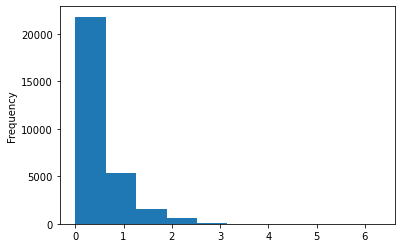

In [129]:
df_predicted['DaysInHospital_predicted'].plot.hist()

### Distribution of Actual DaysInHospital Values

In [125]:
# Actual number of members who have to stay at least 1 day in the hospital
len(df_predicted[df_predicted['DaysInHospital_actual'] >= 1])

4365

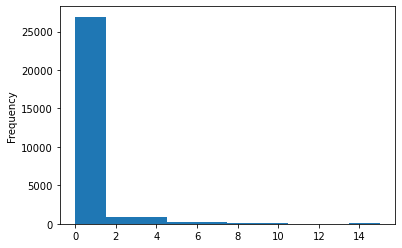

In [126]:
df_predicted['DaysInHospital_actual'].plot.hist()